<a href="https://colab.research.google.com/github/RYAN073-AI/SMS-Spam-Detection/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
import pandas as pd
df=pd.read_csv('spam.csv', encoding='latin-1')
df.shape


(5572, 5)

In [3]:
df.sample(5)#random 5 rows in a dataset


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3280,ham,I tot it's my group mate... Lucky i havent rep...,NaN,NaN,NaN
728,ham,Exactly. Anyways how far. Is jide her to study...,NaN,NaN,NaN
4065,ham,Fyi I'm gonna call you sporadically starting a...,NaN,NaN,NaN
3683,ham,Dad says hurry the hell up,NaN,NaN,NaN
524,spam,"URGENT!: Your Mobile No. was awarded a å£2,000...",NaN,NaN,NaN


## Data Cleaning

In [4]:
df.info()#Get to know that the last 3 colums do not have much information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1236,ham,How much are we getting?
1570,ham,No:-)i got rumour that you going to buy apartm...
4493,ham,Man this bus is so so so slow. I think you're ...
4564,ham,Honeybee Said: *I'm d Sweetest in d World* God...
95,spam,Your free ringtone is waiting to be collected....


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])
df.sample(10)
#1->Spam
#0->Not Spam

,target,text
1502,0,Don no da:)whats you plan?
1036,0,"No my blankets are sufficient, thx"
724,0,The world is running and i am still.maybe all ...
5551,0,Wen did you get so spiritual and deep. That's ...
2441,0,Back in brum! Thanks for putting us up and kee...
1644,0,India have to take lead:)
2664,0,He remains a bro amongst bros
4280,0,"Wn u r hurt by d prsn who s close 2 u, do figh..."
4108,0,I want to lick your pussy now...
3418,1,Do you want a new Video phone? 600 anytime any...


In [10]:
#check for null values
df.isnull().sum()

,0
target,0
text,0


In [11]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [12]:
df=df.drop_duplicates(keep='first')# only consider their first occurrence
df.duplicated().sum()

np.int64(0)

# EDA


In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['target'].value_counts()#tells us how may spam and not spam messages

,count
target,
0,4516
1,653


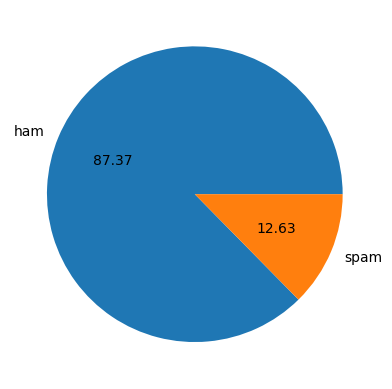

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
#Data is Imbalanced

In [17]:
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()# Details for HAM(NOT spam)

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()#

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

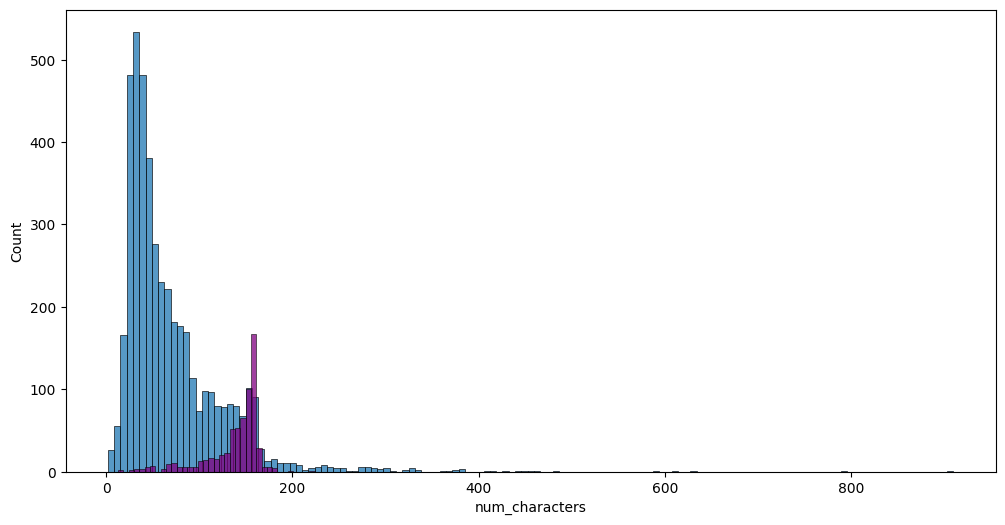

In [25]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='purple')

<Axes: xlabel='num_words', ylabel='Count'>

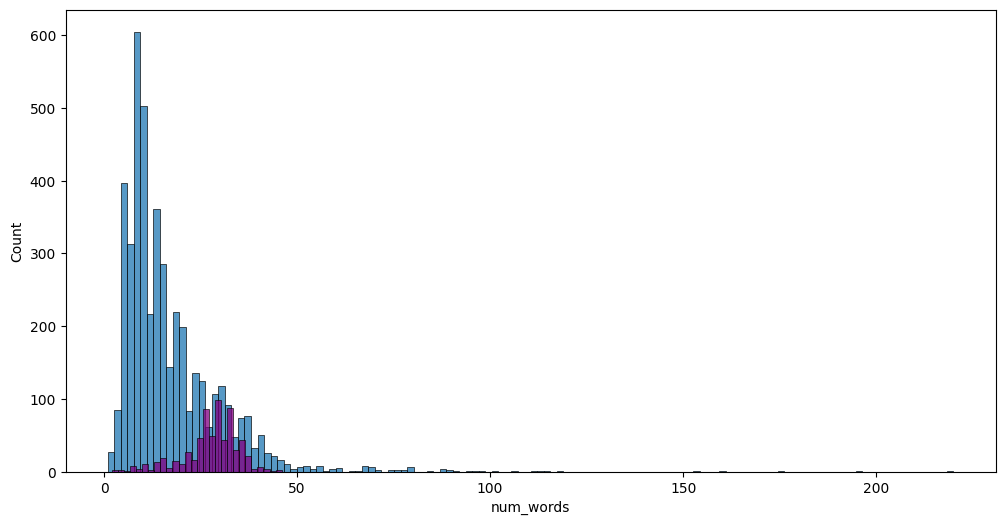

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='purple')

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


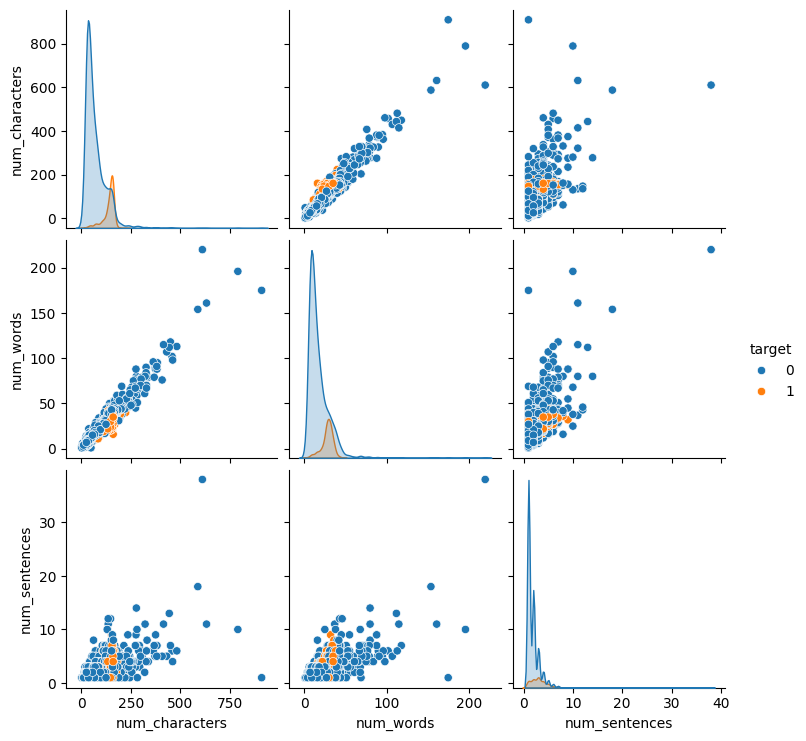

In [28]:
sns.pairplot(df,hue='target')

<Axes: >

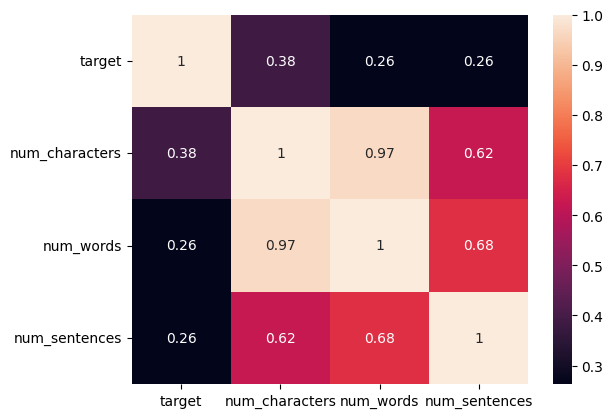

In [29]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)#only extract numberical

# Data Preprocessing


In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [32]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:

print(df['text'][8])

transform_text(df['text'][8])

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.


'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour'

In [34]:
df['transform_text']=df['text'].apply(transform_text)

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [37]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))# extracting the string and concatinating with sep=" "

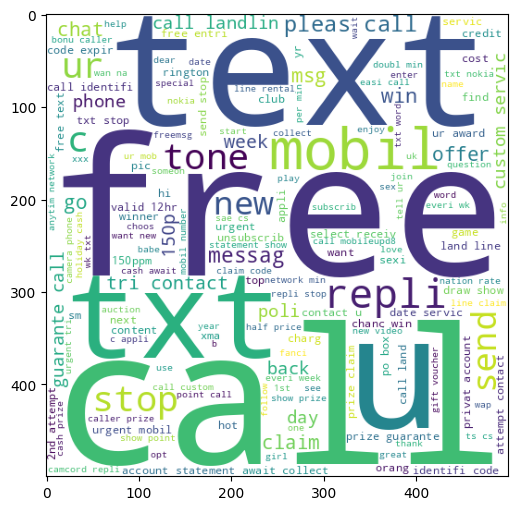

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

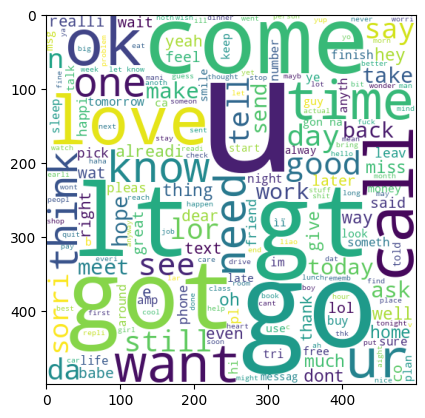

In [39]:
notspam_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.imshow(notspam_wc)

In [40]:
spam_corpus=[]
for i in df[df['target']==1]['transform_text'].tolist():
  for j in i.split():
    spam_corpus.append(j)


In [41]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [42]:
notspam_corpus=[]
for i in df[df['target']==0]['transform_text'].tolist():
  for j in i.split():
    notspam_corpus.append(j)
notspam_corpus


['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [43]:
print("Length of Spam_corpus=>   ",len(spam_corpus))
print("Length of Notspam_corpus=>",len(notspam_corpus))

Length of Spam_corpus=>    9939
Length of Notspam_corpus=> 35404


In [44]:
from collections import Counter
df1=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word','freq'])

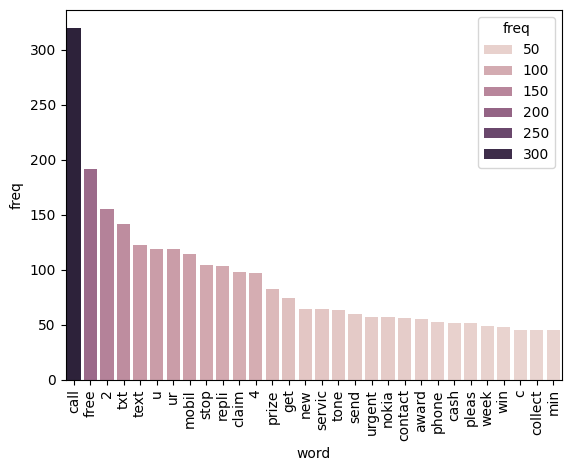

In [45]:
sns.barplot(data=df1,x='word',y='freq',hue='freq')
plt.xticks(rotation='vertical')
plt.show()

In [46]:
df2=pd.DataFrame(Counter(notspam_corpus).most_common(30),columns=['words','freq'])


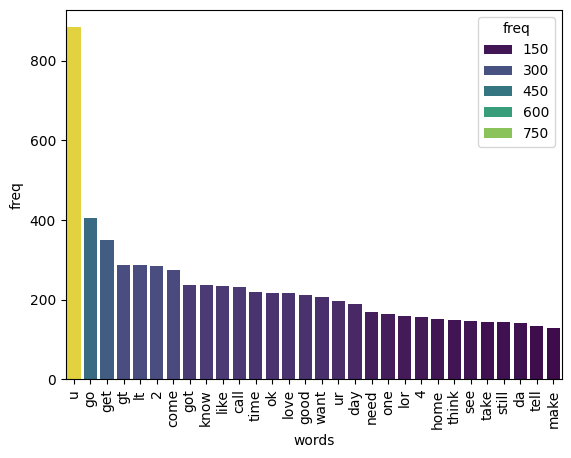

In [47]:
sns.barplot(data=df2,x="words",y='freq',hue='freq', palette="viridis")
plt.xticks(rotation="vertical")
plt.show()

# Model Building


In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [50]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [51]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
X.shape

(5169, 3000)

In [53]:
y=df['target'].values

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [57]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [58]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print()
print(precision_score(y_test,y_pred1))
print()
print(confusion_matrix(y_test,y_pred1))


0.874274661508704

0.5181818181818182

[[790 106]
 [ 24 114]]


In [59]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print()
print(precision_score(y_test,y_pred2))
print()
print(confusion_matrix(y_test,y_pred2))


0.9709864603481625

1.0

[[896   0]
 [ 30 108]]


In [60]:
bnb.fit(X_train,y_train)
y_pred3=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print()
print(precision_score(y_test,y_pred3))
print()
print(confusion_matrix(y_test,y_pred3))

0.9709864603481625

1.0

[[896   0]
 [ 30 108]]


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [63]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [64]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision_score_value = precision_score(y_test, y_pred)

    return  accuracy, precision_score_value


In [65]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [66]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print()
    print("Accuracy - ",current_accuracy)
    print()
    print("Precision - ",current_precision)
    print()
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC

Accuracy -  0.9758220502901354

Precision -  0.9747899159663865

For  KN

Accuracy -  0.9052224371373307

Precision -  1.0

For  NB

Accuracy -  0.9709864603481625

Precision -  1.0

For  DT

Accuracy -  0.9332688588007737

Precision -  0.8415841584158416

For  LR

Accuracy -  0.9555125725338491

Precision -  0.96

For  RF

Accuracy -  0.9738878143133463

Precision -  0.9826086956521739

For  AdaBoost

Accuracy -  0.9216634429400387

Precision -  0.8202247191011236

For  BgC

Accuracy -  0.9584139264990329

Precision -  0.8682170542635659

For  ETC

Accuracy -  0.9748549323017408

Precision -  0.9745762711864406

For  GBDT

Accuracy -  0.9506769825918762

Precision -  0.9306930693069307

For  xgb

Accuracy -  0.9680851063829787

Precision -  0.9487179487179487



In [69]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [70]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.933269,0.841584


In [71]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [72]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.968085
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.933269


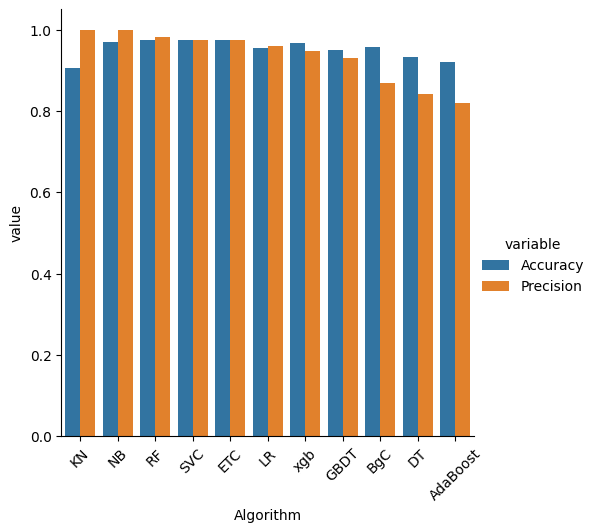

In [73]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.xticks(rotation=45)
plt.show()

In [78]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [79]:
temp_df


,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.933269,0.841584


In [80]:
KN=KNeighborsClassifier()
NB=MultinomialNB()
RF=RandomForestClassifier(n_estimators=50, random_state=2)

In [89]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(estimators=[('KN',KN),('NB',NB),('RF',RF)],voting='hard')

In [103]:
voting_clf.fit(X_train,y_train)
y_pred = voting_clf.predict(X_test)
acc_voting= accuracy_score(y_test, y_pred)
prec_voting= precision_score(y_test, y_pred)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9680851063829787
Precision 1.0


In [104]:
#using Stacking

In [105]:
from sklearn.ensemble import StackingClassifier

In [118]:
from sklearn.svm import SVC # Re-import SVC to ensure it's callable

#defining base models
KN=KNeighborsClassifier()
NB=MultinomialNB()
RF=RandomForestClassifier(n_estimators=50, random_state=2)
svc = SVC(kernel='sigmoid',gamma=1.0)


In [120]:

estimators=[('KN',KN),('NB',NB),('RF',RF),('SVC',svc)]
meta_model=LogisticRegression()

In [121]:
stacking_model=StackingClassifier(estimators=estimators,final_estimator=meta_model)

In [122]:
stacking_model.fit(X_train,y_train)

StackingClassifier(estimators=[('KN', KNeighborsClassifier()),
                               ('NB', MultinomialNB()),
                               ('RF',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('SVC', SVC(gamma=1.0, kernel='sigmoid'))],
                   final_estimator=LogisticRegression())

In [123]:
pred_stack=stacking_model.predict(X_test)

In [124]:
pred_accuracy=accuracy_score(y_test,pred_stack)
pred_precision=precision_score(y_test,pred_stack)

In [134]:
df5=pd.DataFrame([['Stacking',pred_accuracy,pred_precision],['Voting',prec_voting,acc_voting]],columns=['Model','Accuracy','Precision'])

<Axes: xlabel='Model', ylabel='Accuracy'>

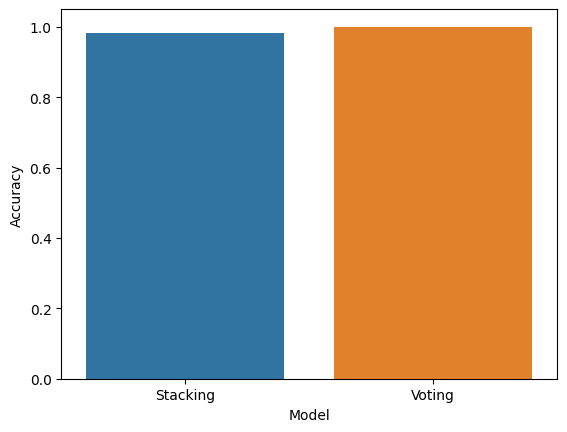

In [145]:
sns.barplot(x='Model',y='Accuracy',data=df5,hue='Model')
